In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_theme(style="darkgrid")


import spacy
from spacymoji import Emoji

import csv
import re
import pandas as pd
import emoji
import regex
from collections import Counter

from tqdm import tqdm
from wordcloud import WordCloud as wc
from stop_words import get_stop_words
import arabic_reshaper # this was missing in your code
from bidi.algorithm import get_display
import jieba




In [136]:
#get the dataset from githup using raw
url='https://raw.githubusercontent.com/Hala-Mulki/L-HSAB-First-Arabic-Levantine-HateSpeech-Dataset/master/Dataset/L-HSAB'
origin_ds=pd.read_table(url,encoding='utf-8')
origin_ds.head()

,Tweet,Class
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,abusive
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,normal
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,normal
3,وليد جنبلاط كاتب الحكمة يا قذر,abusive
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,abusive


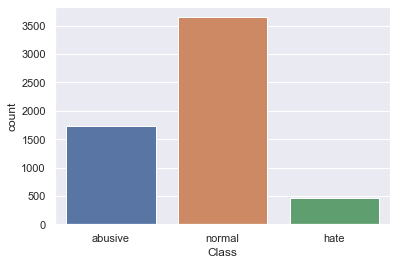

In [22]:
#Class distribution for the L_HSAB
ax=sns.countplot(x='Class', data=origin_ds)


In [180]:
catagories=origin_ds['Class'].unique().tolist()
catagories

['abusive', 'normal', 'hate']

In [23]:
#count the number of dublicates
print(origin_ds['Tweet'].duplicated().sum())

92


In [29]:
#!python -m spacy download en_core_web_sm

# plot emoji count

In [40]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [56]:
text = origin_ds['Tweet']
emoji_list= [] 
for t in text:
  emoji_list=emoji_list+split_count(t)



emojies_dict=dict(Counter(emoji_list))
emojies_dict

{'🤷🏻\u200d♂️': 1,
 '😂': 12,
 '✌': 6,
 '❤': 17,
 '😎': 17,
 '😀': 2,
 '🤔': 2,
 '✋': 2,
 '♂': 4,
 '😁': 1,
 '☹️': 1,
 '😭': 1,
 '☝': 2,
 '😉': 1,
 '♀': 9,
 '💚': 1,
 '♥': 3}

In [68]:
lists = sorted(emojies_dict.items()) # sorted by key, return a list of tuples

emoji_logos, emoji_count = zip(*lists) # unpack a list of pairs into two tuples



In [78]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly


fig = go.Figure()

pio.renderers.default = "notebook"


In [84]:
fig.add_trace(go.Scatter(y=emoji_logos,
                x=emoji_count,
                name='Emoji Counts',
                marker_color='white',
                orientation='h',
                text=emoji_logos,
                textposition='top center',
                mode='markers+text',
                textfont=dict(size=30),
                ))

fig.update_yaxes(visible =False, range=[0, len(emoji_count)+1])
fig.update_xaxes(title='Number of Times Used')

fig.update_layout(
    template='simple_white', 
    height=len(emoji_count)*75, width = 1000)

# word cloud for each class

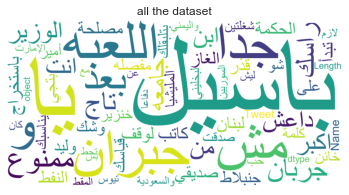

In [202]:
#for the whole dataset
data = arabic_reshaper.reshape(str(origin_ds['Tweet']))
data = get_display(data) # add this line
astopwords=set(get_stop_words('arabic'))
WordCloud = wc(font_path='arial', background_color='white',stopwords=astopwords, width=2000, height=1000).generate(data)
plt.title("all the dataset")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

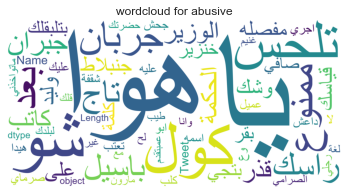

In [204]:
#origin_ds.Tweet[origin_ds.Class=='abusive']
data = arabic_reshaper.reshape(str(origin_ds.Tweet[origin_ds.Class==catagories[0]]))
data = get_display(data) # add this line
WordCloud = wc(font_path='arial',stopwords=astopwords, background_color='white', width=2000, height=1000).generate(data)
plt.title(f"wordcloud for {catagories[0]}")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

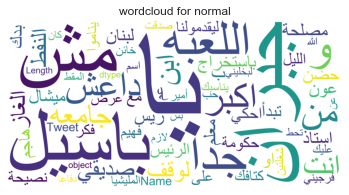

In [205]:
#origin_ds.Tweet[origin_ds.Class=='abusive']
data = arabic_reshaper.reshape(str(origin_ds.Tweet[origin_ds.Class==catagories[1]]))
data = get_display(data) # add this line
WordCloud = wc(font_path='arial',stopwords=astopwords, background_color='white', width=2000, height=1000).generate(data)
plt.title(f"wordcloud for {catagories[1]}")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

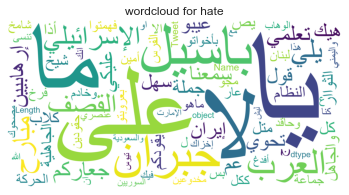

In [206]:
#origin_ds.Tweet[origin_ds.Class=='abusive']
data = arabic_reshaper.reshape(str(origin_ds.Tweet[origin_ds.Class==catagories[2]]))
data = get_display(data) # add this line
WordCloud = wc(font_path='arial',stopwords=astopwords, background_color='white', width=2000, height=1000).generate(data)
plt.title(f"wordcloud for {catagories[2]}")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()